In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from google.colab import drive

# HW 2 (Problem 2)
# Sophia Godfrey
# Student ID: 801149485

In [34]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
filePath = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
df = pd.read_csv(filePath)

# Display first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
# Select inputs
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values  # 1D

# Add bias term
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

# Split dataset (80/20)
np.random.seed(8)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=8)

In [36]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y)**2)

In [37]:
# Gradient descent
def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m = len(y_train)
    train_loss = np.zeros(iterations)
    val_loss = np.zeros(iterations)

    for i in range(iterations):
        errors = X_train.dot(theta) - y_train
        theta -= (learning_rate / m) * X_train.T.dot(errors)
        train_loss[i] = compute_cost(X_train, y_train, theta)
        val_loss[i] = compute_cost(X_val, y_val, theta)

    return theta, train_loss, val_loss

In [38]:
# Scaling functions

# Normalize inputs
def normalize(X_train, X_val):
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    X_train_norm = (X_train - X_min) / (X_max - X_min)
    X_val_norm = (X_val - X_min) / (X_max - X_min)
    return X_train_norm, X_val_norm

X_train_norm, X_val_norm = normalize(X_train, X_val)
X_train_norm = add_bias(X_train_norm)
X_val_norm = add_bias(X_val_norm)

# Standardize inputs
def standardize(X_train, X_val):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)
    X_train_std = (X_train - mu) / sigma
    X_val_std = (X_val - mu) / sigma
    return X_train_std, X_val_std

X_train_std, X_val_std = standardize(X_train, X_val)
X_train_std = add_bias(X_train_std)
X_val_std = add_bias(X_val_std)

In [39]:
# Training settings
learning_rate = 0.01
iterations = 1000
theta_init_norm = np.zeros(X_train_norm.shape[1])
theta_init_std = np.zeros(X_train_std.shape[1])

# Train on normalized data
theta_norm, train_loss_norm, val_loss_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val, theta_init_norm, learning_rate, iterations)

# Train on standardized data
theta_std, train_loss_std, val_loss_std = gradient_descent(X_train_std, y_train, X_val_std, y_val, theta_init_std, learning_rate, iterations)

In [40]:
# Final loss for normalized inputs
final_train_loss_norm = train_loss_norm[-1]
final_val_loss_norm = val_loss_norm[-1]
print(f"Final Training Loss (Normalized): {final_train_loss_norm:.3e}")
print(f"Final Validation Loss (Normalized): {final_val_loss_norm:.3e}")

# Final loss for standardized inputs
final_train_loss_std = train_loss_std[-1]
final_val_loss_std = val_loss_std[-1]
print(f"Final Training Loss (Standardized): {final_train_loss_std:.3e}")
print(f"Final Validation Loss (Standardized): {final_val_loss_std:.3e}")

Final Training Loss (Normalized): 9.294e+11
Final Validation Loss (Normalized): 1.070e+12
Final Training Loss (Standardized): 7.399e+11
Final Validation Loss (Standardized): 8.747e+11


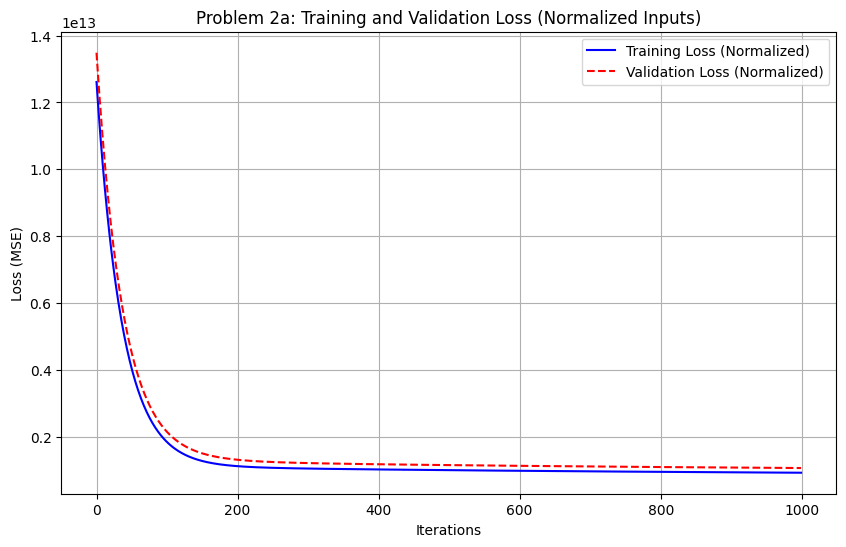

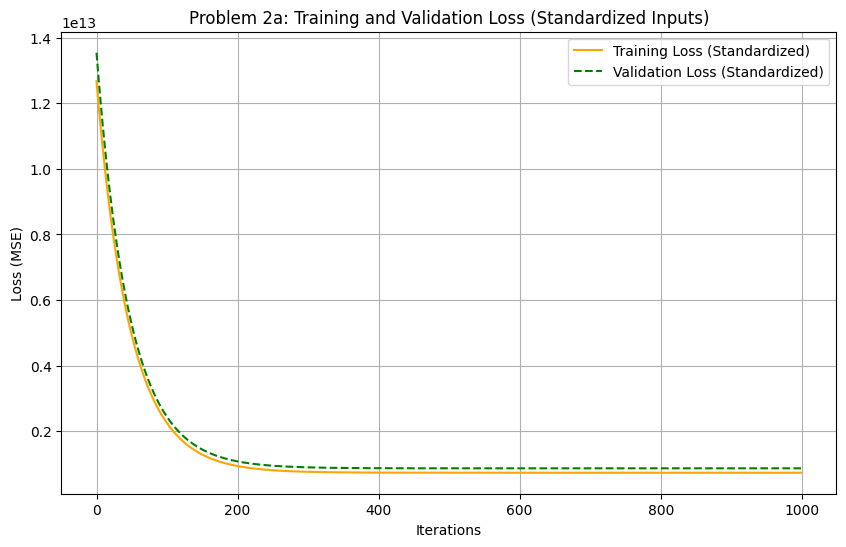

In [41]:
# Plot training and validation losses for Normalized inputs
plt.figure(figsize=(10,6))
plt.plot(range(iterations), train_loss_norm, label='Training Loss (Normalized)', color='blue')
plt.plot(range(iterations), val_loss_norm, label='Validation Loss (Normalized)', linestyle='--', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Problem 2a: Training and Validation Loss (Normalized Inputs)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation losses for Standardized inputs
plt.figure(figsize=(10,6))
plt.plot(range(iterations), train_loss_std, label='Training Loss (Standardized)', color='orange')
plt.plot(range(iterations), val_loss_std, label='Validation Loss (Standardized)', linestyle='--', color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Problem 2a: Training and Validation Loss (Standardized Inputs)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Problem 2b

In [46]:
# Preprocessing for scaling

# Carryover input variables from Problem 1b
features_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
              'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
              'parking', 'prefarea']

# Separate scaling functions
def normalize(X_train, X_val):
    X_min = X_train.min(axis=0)
    X_max = X_train.max(axis=0)
    X_train_norm = (X_train - X_min) / (X_max - X_min)
    X_val_norm = (X_val - X_min) / (X_max - X_min)
    return X_train_norm, X_val_norm

def standardize(X_train, X_val):
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)
    X_train_std = (X_train - mu) / sigma
    X_val_std = (X_val - mu) / sigma
    return X_train_std, X_val_std

# Convert yes/no categorical variables to 0/1
X = df[features_b].map(lambda x: 1 if x == "yes" else (0 if x == "no" else x)).values
y = df['price'].values

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=8)

# Apply normalization and standardization
X_train_norm, X_val_norm = normalize(X_train, X_val)
X_train_std, X_val_std = standardize(X_train, X_val)

# Add bias term
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

X_train_norm = add_bias(X_train_norm)
X_val_norm = add_bias(X_val_norm)
X_train_std = add_bias(X_train_std)
X_val_std = add_bias(X_val_std)

In [47]:
# Initialize parameters
theta_init_norm = np.zeros(X_train_norm.shape[1])
theta_init_std = np.zeros(X_train_std.shape[1])
learning_rate = 0.01
iterations = 1000

# Train on normalized inputs
theta_norm, train_loss_norm, val_loss_norm = gradient_descent(
    X_train_norm, y_train, X_val_norm, y_val, theta_init_norm, learning_rate, iterations
)

# Train on standardized inputs
theta_std, train_loss_std, val_loss_std = gradient_descent(
    X_train_std, y_train, X_val_std, y_val, theta_init_std, learning_rate, iterations
)

In [50]:
print(f"Final Training Loss (Normalized): {train_loss_norm[199]:.3e}")
print(f"Final Validation Loss (Normalized): {val_loss_norm[199]:.3e}")
print(f"Final Training Loss (Standardized): {train_loss_std[199]:.3e}")
print(f"Final Validation Loss (Standardized): {val_loss_std[199]:.3e}")

Final Training Loss (Normalized): 8.761e+11
Final Validation Loss (Normalized): 9.646e+11
Final Training Loss (Standardized): 7.639e+11
Final Validation Loss (Standardized): 7.871e+11


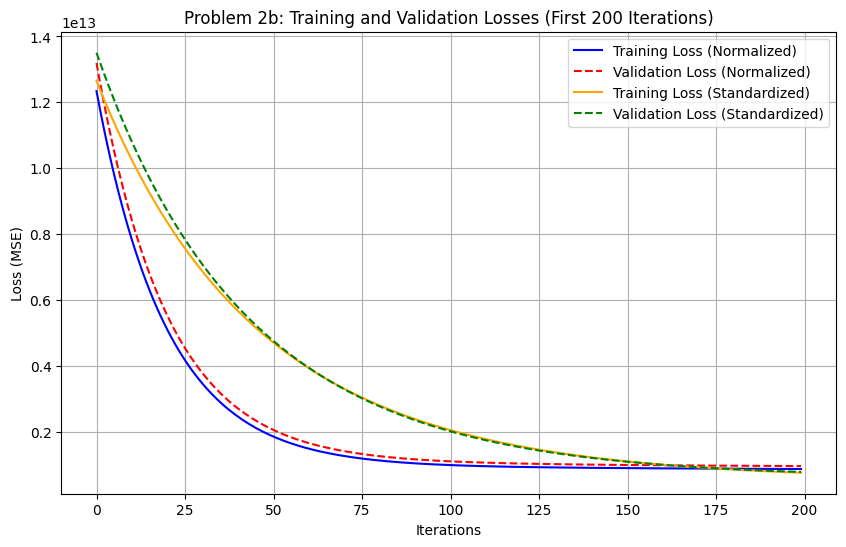

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(200), train_loss_norm[:200], label='Training Loss (Normalized)', color='blue')
plt.plot(range(200), val_loss_norm[:200], label='Validation Loss (Normalized)', linestyle='--', color='red')
plt.plot(range(200), train_loss_std[:200], label='Training Loss (Standardized)', color='orange')
plt.plot(range(200), val_loss_std[:200], label='Validation Loss (Standardized)', linestyle='--', color='green')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Problem 2b: Training and Validation Losses (First 200 Iterations)')
plt.legend()
plt.grid(True)
plt.show()